In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, f1_score, precision_score, recall_score, balanced_accuracy_score,log_loss
from sklearn.preprocessing import StandardScaler

In [8]:
train = pd.read_csv("Churn_data_train.csv").drop('Unnamed: 0',axis=1)
test = pd.read_csv("Churn_data_test.csv").drop('Unnamed: 0',axis=1)

In [54]:
train.shape

(8236, 24)

In [10]:
y_train = train[['Churn']]
y_test = test[['Churn']]
X_train = train.drop('Churn',axis = 1)
X_test = test.drop('Churn',axis = 1)

In [56]:
X_train.columns

Index(['gender_Male', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure', 'MonthlyCharges', 'Age'],
      dtype='object')

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

Since Random Forest method can automatically balance data sets when a class is less frequent than others, we don't use SMOTE in this model.

In [31]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
accuracy = rf.score(X_test, y_test)
test_error_rf = 1 - accuracy
test_error_rf

/var/folders/s1/1d0mf_6953gg1sfyjq5dqtw40000gn/T/ipykernel_15591/3047738923.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


0.2174840085287847

In [13]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
confusion_matrix(y_test, y_pred)

array([[883, 162],
       [144, 218]])

In [58]:
# Evaluate the model on the testing set
y_pred = rf.predict(X_test)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# Calculate evaluation metrics
auc_score = roc_auc_score(y_test, y_pred)
ber_score = 1 - balanced_accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
logloss = log_loss(y_test, y_pred)

# Print the evaluation metrics
print("AUC score: {:.4f}".format(auc_score))
print("BER score: {:.4f}".format(ber_score))
print("F1 score: {:.4f}".format(f1))
print("Recall score: {:.4f}".format(recall))
print("Precision score: {:.4f}".format(precision))
print("Log loss: {:.4f}".format(logloss))

# Plot the feature importance
plt.show()

AUC score: 0.7236
BER score: 0.2764
F1 score: 0.5876
Recall score: 0.6022
Precision score: 0.5737
Log loss: 7.5117


Next, we initialize a RandomForestClassifier and set up a cross-validation scheme and hyperparameter grid for model tuning.

In [20]:
rfc = RandomForestClassifier(random_state=44) 

In [59]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 14)
hyper_params = { 
    'n_estimators': [50, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,8, 12]
}

In [60]:
CV_rfc = GridSearchCV(estimator=rfc, 
                      param_grid= hyper_params, 
                      cv= folds, 
                      scoring='roc_auc',
                      n_jobs = -1,
                      verbose = 10)
CV_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


exception calling callback for <Future at 0x7fde58bbe9a0 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/meredithwang/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 426, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/Users/meredithwang/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'SafeFunction' on <module 'joblib._parallel_backends' from '/Users/meredithwang/opt/anaconda3/lib/python3.9/site-packages/joblib/_parallel_backends.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/meredithwang/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
  File "/Users/meredithwang/op

Unexpected exception formatting exception. Falling back to standard exception


joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/meredithwang/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 426, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/Users/meredithwang/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'SafeFunction' on <module 'joblib._parallel_backends' from '/Users/meredithwang/opt/anaconda3/lib/python3.9/site-packages/joblib/_parallel_backends.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/meredithwang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/s1/1d0mf_6953gg1sfyjq5dqtw40000gn/T/ipykernel_14720/3921801

In [23]:
CV_rfc.best_params_

{'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 200}

In [24]:
# use the parameter found
rf = RandomForestClassifier(random_state=10, n_estimators = 200, max_features='sqrt', max_depth=12)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
confusion_matrix(y_test, y_pred)

/var/folders/s1/1d0mf_6953gg1sfyjq5dqtw40000gn/T/ipykernel_15591/2498804293.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


array([[841, 204],
       [113, 249]])

In [26]:
# Compute the True Positive Rate and the False Ppositive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1], pos_label=1.0)
roc_auc =  auc(fpr, tpr)
roc_auc

0.8305479922810542

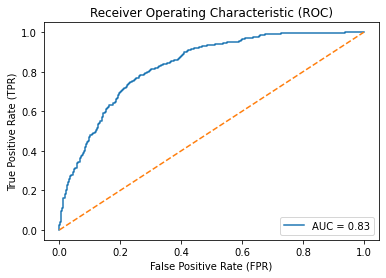

In [27]:
# Plot ROC
plt.plot(fpr,tpr,label= 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'--')  # plot a diagonal line from the lower left to the upper right
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

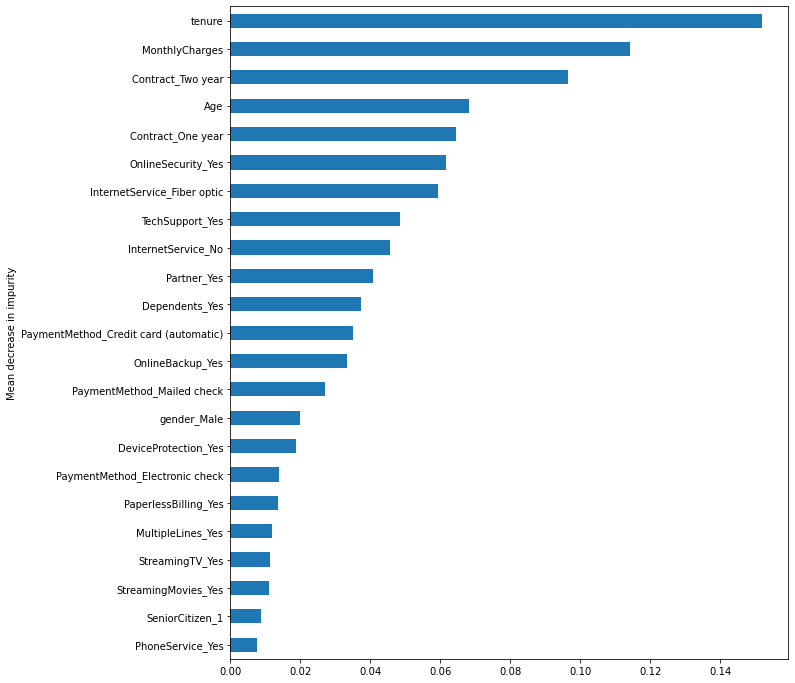

In [28]:
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index= rf.feature_names_in_)

plt.figure(figsize=(10,12))
forest_importances.sort_values(ascending = True).plot.barh()
plt.ylabel("Mean decrease in impurity")
plt.show()